In [36]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.preprocessing import LabelEncoder,OneHotEncoder,OrdinalEncoder,StandardScaler,MinMaxScaler
from sklearn.model_selection import GridSearchCV,RandomizedSearchCV
from sklearn.linear_model import Lasso,Ridge
import json
import pickle
import warnings
warnings.filterwarnings('ignore')

In [ ]:
#problem statement
# Predict medical insurance price /Premium base on independent variables

In [5]:
#Data Gathering
df = pd.read_csv("medical_insurance.csv")
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [8]:
#EDA
df.shape

(1338, 7)

In [9]:
df.columns

Index(['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'charges'], dtype='object')

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [11]:
df.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


In [17]:
df.isna().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [27]:
#EDA on age col  
df['age'].nunique()

47

In [33]:
df['age'].value_counts()

age
18    69
19    68
50    29
51    29
47    29
46    29
45    29
20    29
48    29
52    29
22    28
49    28
54    28
53    28
21    28
26    28
24    28
25    28
28    28
27    28
23    28
43    27
29    27
30    27
41    27
42    27
44    27
31    27
40    27
32    26
33    26
56    26
34    26
55    26
57    26
37    25
59    25
58    25
36    25
38    25
35    25
39    25
61    23
60    23
63    23
62    23
64    22
Name: count, dtype: int64

<Axes: xlabel='age', ylabel='Density'>

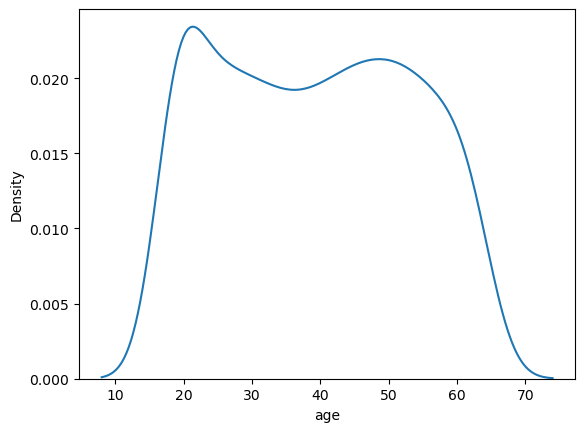

In [37]:
sns.kdeplot(df['age'])

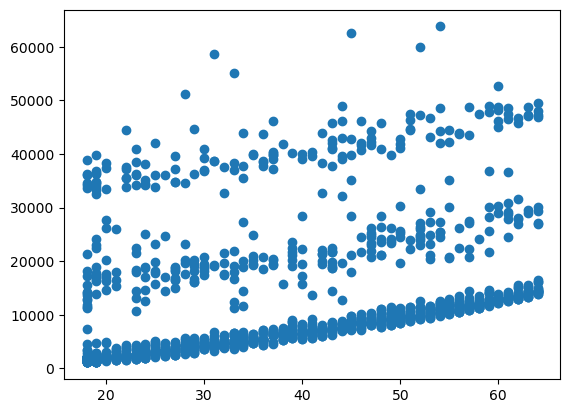

In [44]:
plt.scatter(df['age'],df['charges']) #linearity

In [47]:
pd.crosstab(df['charges'],df['age']).head()

age,18,19,20,21,22,23,24,25,26,27,...,55,56,57,58,59,60,61,62,63,64
charges,,,,,,,,,,,,,,,,,,,,,
1121.8739,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1131.5066,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1135.9407,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1136.3994,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1137.0110,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [50]:
#no multicolinearity
df1=df.drop(columns=['charges','sex','smoker','region'],axis=1)
vif=pd.DataFrame()
vif['features']=df1.columns 
vif['vif_factor']=[variance_inflation_factor (df1.values,i) for i in range (df1.shape[1])]
vif

,features,vif_factor
0,age,7.536550
1,bmi,7.846515
2,children,1.796637


In [51]:
df1.corr()

,age,bmi,children
age,1.000000,0.109272,0.042469
bmi,0.109272,1.000000,0.012759
children,0.042469,0.012759,1.000000


<Axes: >

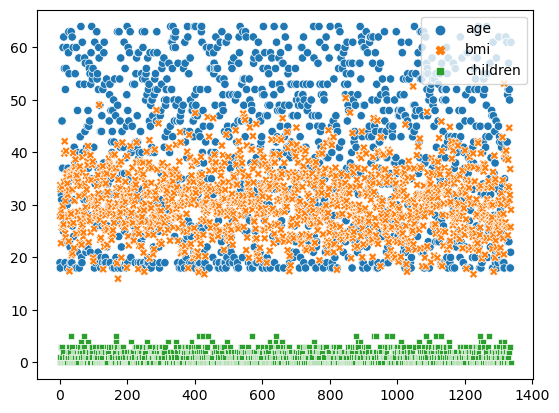

In [54]:
sns.scatterplot(df1)

<Axes: >

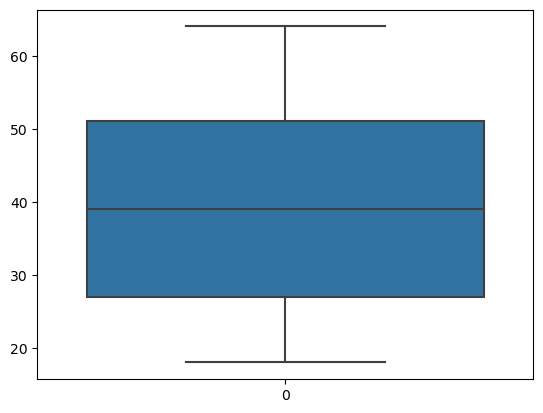

In [52]:
sns.boxplot(df['age'])

<Axes: xlabel='age', ylabel='Count'>

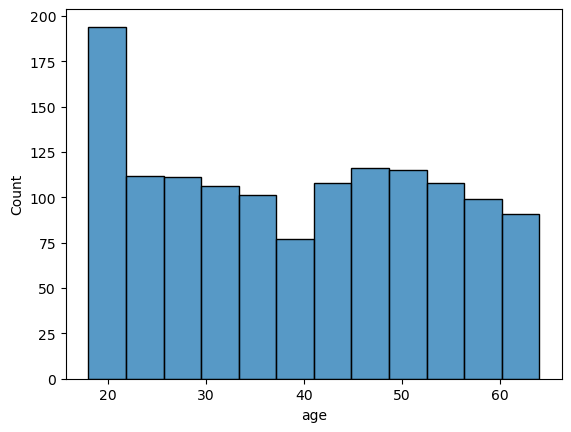

In [55]:
sns.histplot(df['age'])

<Axes: ylabel='age'>

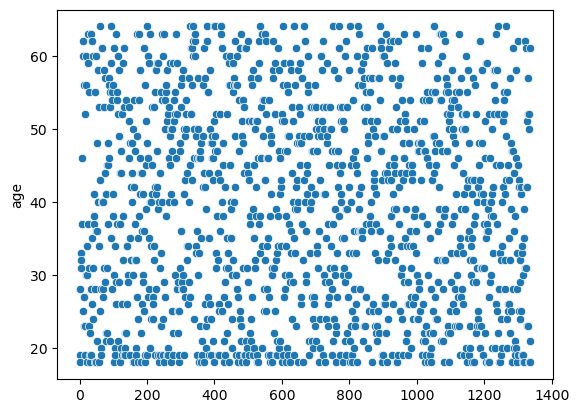

In [64]:
sns.scatterplot(df['age'])

<Axes: xlabel='sex', ylabel='Count'>

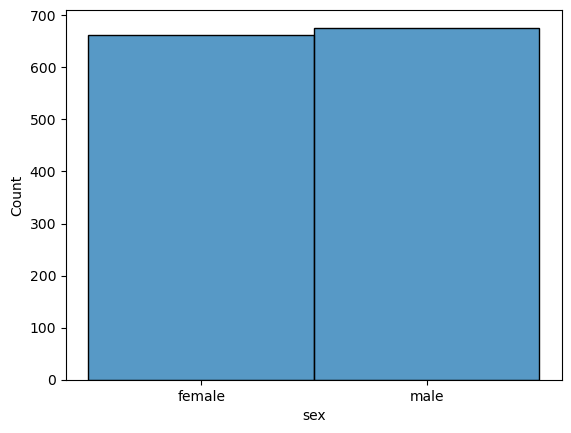

In [61]:
#col sex
sns.histplot(df['sex'])

<Axes: ylabel='sex'>

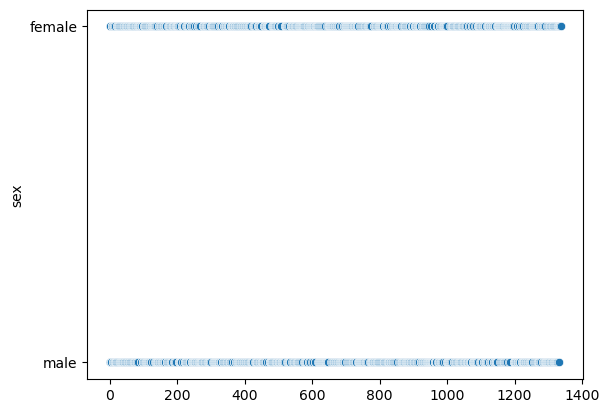

In [67]:
sns.scatterplot(df['sex'])

In [69]:
df['sex'].value_counts()

sex
male      676
female    662
Name: count, dtype: int64

In [71]:
df['sex'].unique()

array(['female', 'male'], dtype=object)

In [80]:
#col bmi
df['bmi'].nunique()

548

In [74]:
df['bmi'].value_counts()

bmi
32.300    13
28.310     9
30.495     8
30.875     8
31.350     8
          ..
46.200     1
23.800     1
44.770     1
32.120     1
30.970     1
Name: count, Length: 548, dtype: int64

<Axes: >

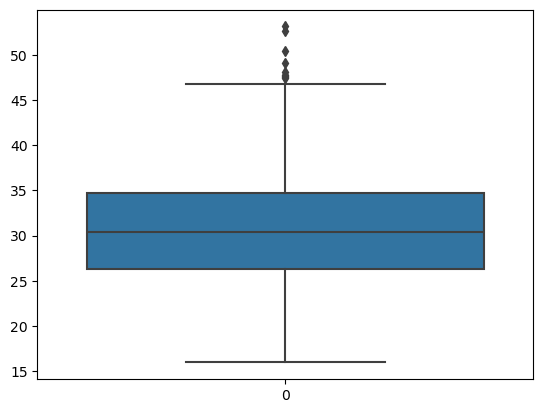

In [75]:
sns.boxplot(df['bmi'])

<Axes: ylabel='bmi'>

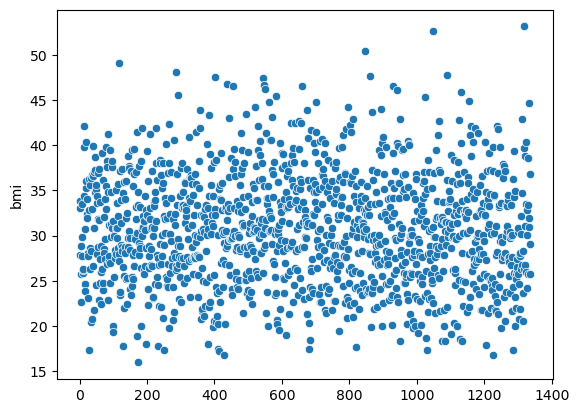

In [76]:
sns.scatterplot(df['bmi'])

<Axes: xlabel='bmi', ylabel='Count'>

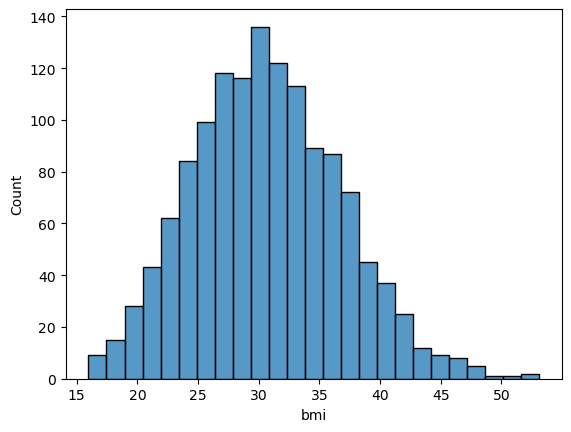

In [77]:
sns.histplot(df['bmi'])

<Axes: xlabel='bmi', ylabel='Density'>

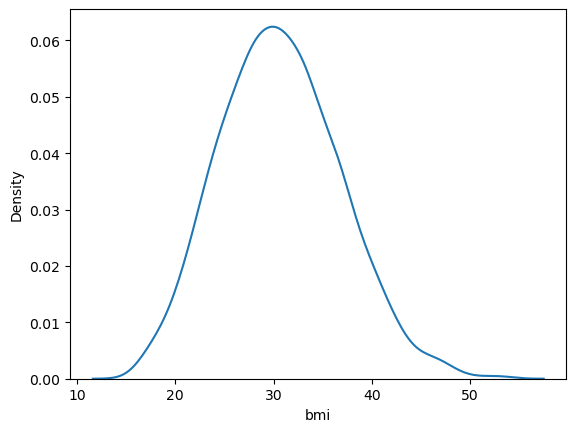

In [90]:
sns.kdeplot(df['bmi'])

In [81]:
#col childern
df['children'].value_counts()

children
0    574
1    324
2    240
3    157
4     25
5     18
Name: count, dtype: int64

In [79]:
df['children'].unique()

array([0, 1, 3, 2, 5, 4], dtype=int64)

<Axes: >

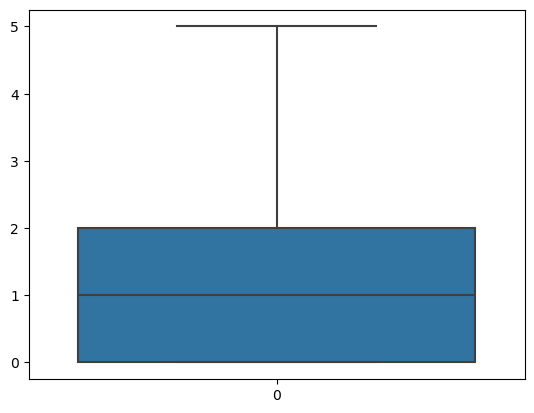

In [83]:
sns.boxplot(df['children'])

<Axes: xlabel='children', ylabel='Count'>

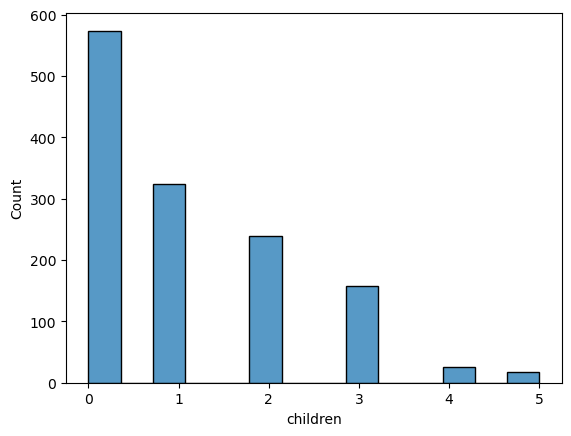

In [84]:
sns.histplot(df['children'])

<Axes: ylabel='children'>

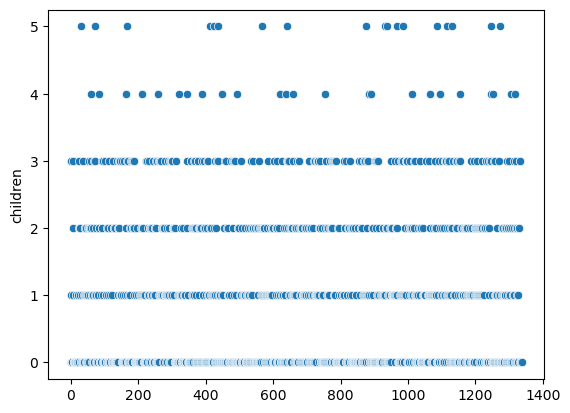

In [85]:
sns.scatterplot(df['children'])

In [86]:
df['smoker'].unique()

array(['yes', 'no'], dtype=object)

In [87]:
df['smoker'].value_counts()

smoker
no     1064
yes     274
Name: count, dtype: int64

<Axes: xlabel='smoker', ylabel='Count'>

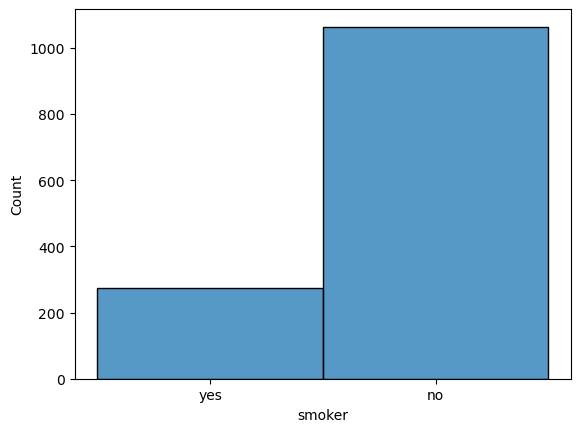

In [88]:
sns.histplot(df['smoker'])

<Axes: ylabel='smoker'>

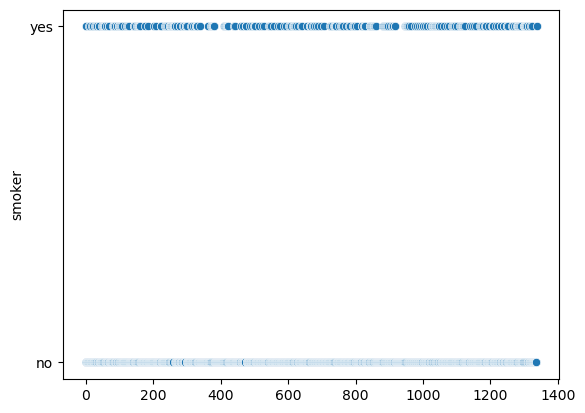

In [89]:
sns.scatterplot(df['smoker'])

In [93]:
df['region'].value_counts()

region
southeast    364
southwest    325
northwest    325
northeast    324
Name: count, dtype: int64

In [94]:
df['region'].unique()

array(['southwest', 'southeast', 'northwest', 'northeast'], dtype=object)

<Axes: xlabel='region', ylabel='Count'>

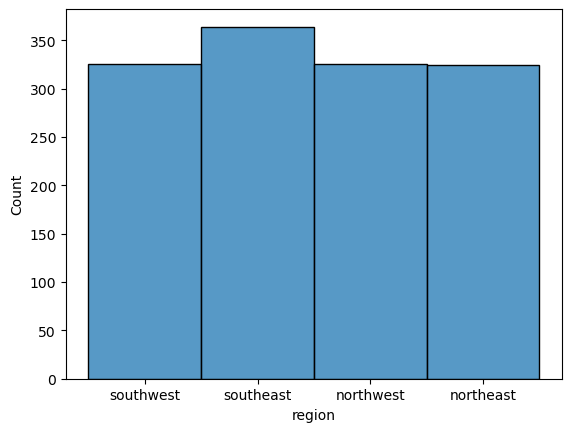

In [95]:
sns.histplot(df['region'])

<Axes: ylabel='region'>

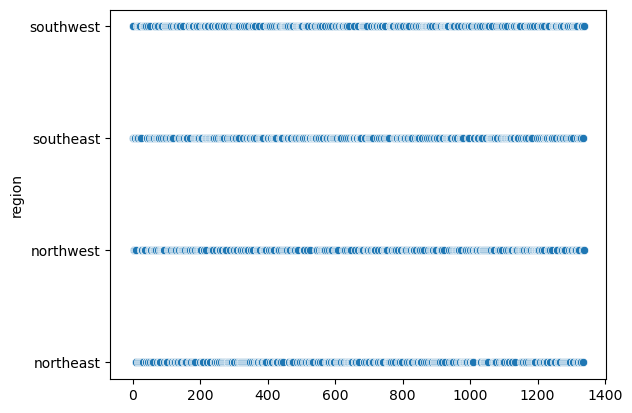

In [96]:
sns.scatterplot(df['region'])

In [56]:
df.columns

Index(['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'charges'], dtype='object')

In [99]:
df['charges'].nunique()

1337

<Axes: xlabel='charges', ylabel='Density'>

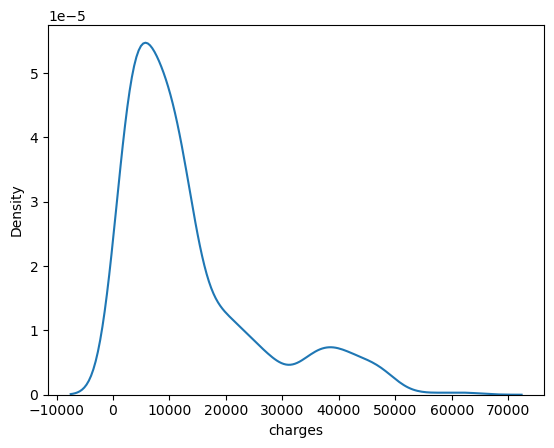

In [100]:
sns.kdeplot(df['charges'])

<Axes: ylabel='charges'>

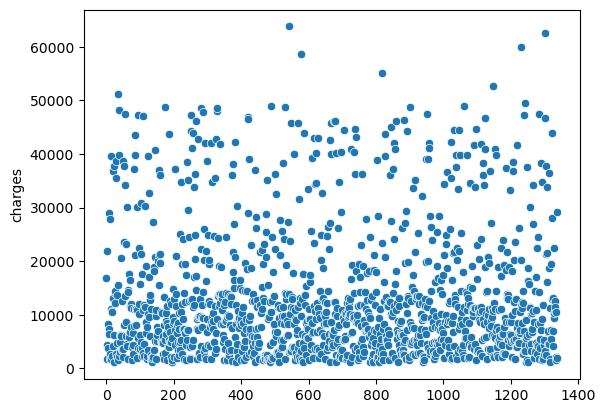

In [101]:
sns.scatterplot(df['charges'])

<Axes: >

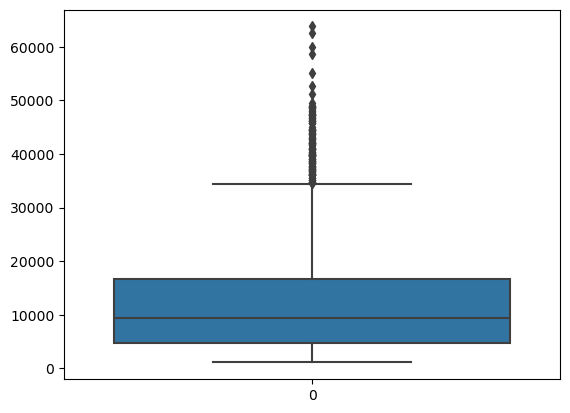

In [102]:
sns.boxplot(df['charges'])

<Axes: xlabel='charges', ylabel='Count'>

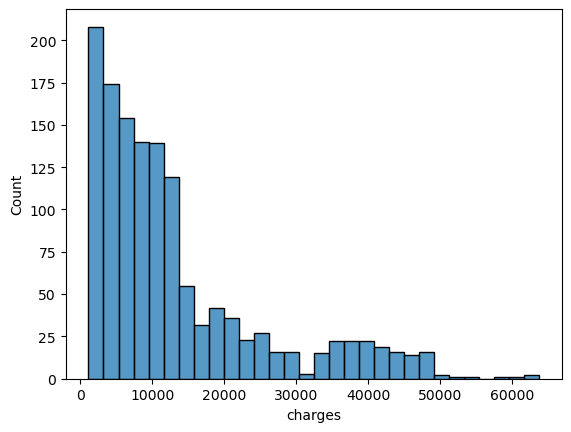

In [103]:
sns.histplot(df['charges'])

In [109]:
#feature engineering
#treat missing value fillna
#rename and encoding
df.rename({'sex':'gender'},inplace=True,axis=1)

In [110]:
df.head()

,age,gender,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [111]:
df['gender'].replace({'male':0,'female':1},inplace=True)

In [112]:
df['gender'].unique()

array([1, 0], dtype=int64)

In [113]:
df['smoker'].replace({'no':0,'yes':1},inplace=True)

In [114]:
df['smoker'].unique()

array([1, 0], dtype=int64)

In [161]:
df.head()

,age,gender,bmi,children,smoker,charges,region
0,19,1,27.900,0,1,16884.92400,southwest
1,18,0,33.770,1,0,1725.55230,southeast
2,28,0,33.000,3,0,4449.46200,southeast
3,33,0,22.705,0,0,21984.47061,northwest
4,32,0,28.880,0,0,3866.85520,northwest


In [185]:
#pd.get_dummies(df[['region']])
df1 = pd.get_dummies(df1,columns = ["region"])
df1.head()

,age,gender,bmi,children,smoker,charges,region_northeast,region_northwest,region_southeast,region_southwest
0,19,1,27.900,0,1,16884.92400,False,False,False,True
1,18,0,33.770,1,0,1725.55230,False,False,True,False
2,28,0,33.000,3,0,4449.46200,False,False,True,False
3,33,0,22.705,0,0,21984.47061,False,True,False,False
4,32,0,28.880,0,0,3866.85520,False,True,False,False


In [178]:
df2['region'].unique()

array(['southwest', 'southeast', 'northwest', 'northeast'], dtype=object)

In [211]:
df['region_northeast']=df['region_northeast'].astype('int')

In [213]:
df['region_southeast']=df['region_southeast'].astype('int')

In [212]:
df['region_southwest']=df['region_southwest'].astype('int')

In [209]:
df['region_northwest']=df['region_northwest'].astype('int')

In [214]:
df.head()

,age,gender,bmi,children,smoker,charges,region_northeast,region_northwest,region_southeast,region_southwest
0,19,1,27.900,0,1,16884.92400,0,0,0,1
1,18,0,33.770,1,0,1725.55230,0,0,1,0
2,28,0,33.000,3,0,4449.46200,0,0,1,0
3,33,0,22.705,0,0,21984.47061,0,1,0,0
4,32,0,28.880,0,0,3866.85520,0,1,0,0


In [219]:
#data split
x = df.drop("charges",axis=1)
y = df["charges"]
x_train, x_test, y_train, y_test = train_test_split(x,y,train_size=0.80,random_state=40)

In [221]:
x_train.shape,x_test.shape

((1070, 9), (268, 9))

In [222]:
#model training
lr_model=LinearRegression()
lr_model.fit(x_train,y_train)

LinearRegression()

In [224]:
y_pred=lr_model.predict(x_train)
y_pred

array([ 2893.82017885,  4485.15616043, 10908.3968488 , ...,
       11742.85915   ,  8077.45779837,  1229.11508773])

In [228]:
#model evaluation on training data using linear regression model
mse=mean_squared_error(y_train,y_pred)
print('MSE is ',mse)
mae=mean_absolute_error(y_train,y_pred)
print('MAE is ',mae)
r2=r2_score(y_train,y_pred)
print('r2 score is ',r2)
adj_r2=1-((1-r2)*(x_train.shape[0]-1)/(x_train.shape[0]-x_train.shape[1]-1))
print('adj r2 score is ',adj_r2)

MSE is  35738908.17587644
MAE is  4103.694591054445
r2 score is  0.7548625668706685
adj r2 score is  0.7527812113063629


In [230]:
#model evaluation on testing data using linear regression model
y_pred=lr_model.predict(x_test)
mse=mean_squared_error(y_test,y_pred)
print('MSE is ',mse)
mae=mean_absolute_error(y_test,y_pred)
print('MAE is ',mae)
r2=r2_score(y_test,y_pred)
print('r2 score is ',r2)
adj_r2=1-((1-r2)*(x_test.shape[0]-1)/(x_test.shape[0]-x_test.shape[1]-1))
print('adj r2 score is ',adj_r2)

MSE is  39737837.06024521
MAE is  4358.280567455451
r2 score is  0.7341854344194202
adj r2 score is  0.7249128332945163


In [231]:
rm=Ridge()
rm.fit(x_train,y_train)

Ridge()

In [232]:
#model evaluation on training data using ridge model
y_pred=rm.predict(x_train)
mse=mean_squared_error(y_train,y_pred)
print('MSE is ',mse)
mae=mean_absolute_error(y_train,y_pred)
print('MAE is ',mae)
r2=r2_score(y_train,y_pred)
print('r2 score is ',r2)
adj_r2=1-((1-r2)*(x_train.shape[0]-1)/(x_train.shape[0]-x_train.shape[1]-1))
print('adj r2 score is ',adj_r2)

MSE is  35741939.22719446
MAE is  4113.759116927941
r2 score is  0.7548417765282182
adj r2 score is  0.7527602444421371


In [233]:
#model evaluation on testing data using ridge model
y_pred=rm.predict(x_test)
mse=mean_squared_error(y_test,y_pred)
print('MSE is ',mse)
mae=mean_absolute_error(y_test,y_pred)
print('MAE is ',mae)
r2=r2_score(y_test,y_pred)
print('r2 score is ',r2)
adj_r2=1-((1-r2)*(x_test.shape[0]-1)/(x_test.shape[0]-x_test.shape[1]-1))
print('adj r2 score is ',adj_r2)

MSE is  39759918.40788041
MAE is  4368.305379404604
r2 score is  0.7340377277432821
adj r2 score is  0.7247599740599082


In [234]:
lm=Lasso()
lm.fit(x_train,y_train)

Lasso()

In [235]:
#model evaluation on training data using lasso model
y_pred=lm.predict(x_train)
mse=mean_squared_error(y_train,y_pred)
print('MSE is ',mse)
mae=mean_absolute_error(y_train,y_pred)
print('MAE is ',mae)
r2=r2_score(y_train,y_pred)
print('r2 score is ',r2)
adj_r2=1-((1-r2)*(x_train.shape[0]-1)/(x_train.shape[0]-x_train.shape[1]-1))
print('adj r2 score is ',adj_r2)

MSE is  35738938.33336084
MAE is  4104.021158606027
r2 score is  0.7548623600168867
adj r2 score is  0.7527810026962753


In [236]:
#model evaluation on testing data using lasso model
y_pred=lm.predict(x_test)
mse=mean_squared_error(y_test,y_pred)
print('MSE is ',mse)
mae=mean_absolute_error(y_test,y_pred)
print('MAE is ',mae)
r2=r2_score(y_test,y_pred)
print('r2 score is ',r2)
adj_r2=1-((1-r2)*(x_test.shape[0]-1)/(x_test.shape[0]-x_test.shape[1]-1))
print('adj r2 score is ',adj_r2)

MSE is  39742788.63484018
MAE is  4358.598941676023
r2 score is  0.7341523123184888
adj r2 score is  0.7248785557714592


In [238]:
#model evaluation on training data using ridge hyperparameter tuning greed search cv
estemeter_ridge=Ridge()
parameter_grid={'alpha':np.arange(0.1,3,0.01)}
gdsearch=GridSearchCV(estimator=estemeter_ridge,param_grid=parameter_grid,cv=5)
gdsearch.fit(x_train,y_train)
gdsearch.best_estimator_

Ridge(alpha=0.9099999999999996)

In [239]:
ridge_model=gdsearch.best_estimator_
y_pred=ridge_model.predict(x_train)
mse=mean_squared_error(y_train,y_pred)
print('MSE is ',mse)
mae=mean_absolute_error(y_train,y_pred)
print('MAE is ',mae)
r2=r2_score(y_train,y_pred)
print('r2 score is ',r2)
adj_r2=1-((1-r2)*(x_train.shape[0]-1)/(x_train.shape[0]-x_train.shape[1]-1))
print('adj r2 score is ',adj_r2)

MSE is  35741420.817457125
MAE is  4112.849418378689
r2 score is  0.7548453323624281
adj r2 score is  0.7527638304673921


In [241]:
#model evaluation on testing data using ridge hyperparameter tuning greed search cv
y_pred=gdsearch.predict(x_test)
mse=mean_squared_error(y_test,y_pred)
print('MSE is ',mse)
mae=mean_absolute_error(y_test,y_pred)
print('MAE is ',mae)
r2=r2_score(y_test,y_pred)
print('r2 score is ',r2)
adj_r2=1-((1-r2)*(x_test.shape[0]-1)/(x_test.shape[0]-x_test.shape[1]-1))
print('adj r2 score is ',adj_r2)

MSE is  39757697.755814195
MAE is  4367.383695443012
r2 score is  0.7340525821417083
adj r2 score is  0.7247753466350237


In [245]:
#model evaluation on training data using ridge hyperparameter tuning randomized search cv
estemeter_ridge=Ridge()
parameter_grid={'alpha':np.arange(0.1,3,0.01)}
rdsearch=RandomizedSearchCV(estimator=estemeter_ridge,param_distributions=parameter_grid,cv=5)
rdsearch.fit(x_train,y_train)
rdsearch.best_estimator_

Ridge(alpha=0.9199999999999996)

In [246]:
ridge_model_rscv=rdsearch.best_estimator_
y_pred=ridge_model_rscv.predict(x_train)
mse=mean_squared_error(y_train,y_pred)
print('MSE is ',mse)
mae=mean_absolute_error(y_train,y_pred)
print('MAE is ',mae)
r2=r2_score(y_train,y_pred)
print('r2 score is ',r2)
adj_r2=1-((1-r2)*(x_train.shape[0]-1)/(x_train.shape[0]-x_train.shape[1]-1))
print('adj r2 score is ',adj_r2)

MSE is  35741476.04511114
MAE is  4112.950511332601
r2 score is  0.7548449535493632
adj r2 score is  0.7527634484379899


In [247]:
#model evaluation on testing data using ridge hyperparameter tuning randomized search cv
y_pred=ridge_model_rscv.predict(x_test)
mse=mean_squared_error(y_test,y_pred)
print('MSE is ',mse)
mae=mean_absolute_error(y_test,y_pred)
print('MAE is ',mae)
r2=r2_score(y_test,y_pred)
print('r2 score is ',r2)
adj_r2=1-((1-r2)*(x_test.shape[0]-1)/(x_test.shape[0]-x_test.shape[1]-1))
print('adj r2 score is ',adj_r2)

MSE is  39757942.24079758
MAE is  4367.485351448999
r2 score is  0.7340509467313675
adj r2 score is  0.724773654175485


In [248]:
#model evaluation on training data using lasso hyperparameter tuning greed search cv
estemeter_lasso=Lasso()
parameter_grid={'alpha':np.arange(0.1,3,0.01)}
gdsearch=GridSearchCV(estimator=estemeter_lasso,param_grid=parameter_grid,cv=5)
gdsearch.fit(x_train,y_train)
gdsearch.best_estimator_

Lasso(alpha=2.9899999999999984)

In [249]:
lasso_gd_model=gdsearch.best_estimator_
y_pred=lasso_gd_model.predict(x_train)
mse=mean_squared_error(y_train,y_pred)
print('MSE is ',mse)
mae=mean_absolute_error(y_train,y_pred)
print('MAE is ',mae)
r2=r2_score(y_train,y_pred)
print('r2 score is ',r2)
adj_r2=1-((1-r2)*(x_train.shape[0]-1)/(x_train.shape[0]-x_train.shape[1]-1))
print('adj r2 score is ',adj_r2)

MSE is  35739177.13012845
MAE is  4104.70425669034
r2 score is  0.7548607220813806
adj r2 score is  0.7527793508537697


In [250]:
#model evaluation on testing data using lasso hyperparameter tuning greed search cv
y_pred=lasso_gd_model.predict(x_test)
mse=mean_squared_error(y_test,y_pred)
print('MSE is ',mse)
mae=mean_absolute_error(y_test,y_pred)
print('MAE is ',mae)
r2=r2_score(y_test,y_pred)
print('r2 score is ',r2)
adj_r2=1-((1-r2)*(x_test.shape[0]-1)/(x_test.shape[0]-x_test.shape[1]-1))
print('adj r2 score is ',adj_r2)

MSE is  39752833.47471157
MAE is  4359.22757363757
r2 score is  0.7340851203185144
adj r2 score is  0.7248090198645091


In [253]:
#model evaluation on training data using lasso hyperparameter tuning randomized search cv
estemeter_lasso=Lasso()
parameter_grid={'alpha':np.arange(0.1,3,0.01)}
rgdsearch=RandomizedSearchCV(estimator=estemeter_lasso,param_distributions=parameter_grid,cv=5)
rgdsearch.fit(x_train,y_train)
rgdsearch.best_estimator_

Lasso(alpha=2.6899999999999986)

In [254]:
lasso_rgd_model=rgdsearch.best_estimator_
y_pred=lasso_rgd_model.predict(x_train)
mse=mean_squared_error(y_train,y_pred)
print('MSE is ',mse)
mae=mean_absolute_error(y_train,y_pred)
print('MAE is ',mae)
r2=r2_score(y_train,y_pred)
print('r2 score is ',r2)
adj_r2=1-((1-r2)*(x_train.shape[0]-1)/(x_train.shape[0]-x_train.shape[1]-1))
print('adj r2 score is ',adj_r2)

MSE is  35739125.89620493
MAE is  4104.5986301817065
r2 score is  0.7548610735009718
adj r2 score is  0.7527797052571121


In [255]:
#model evaluation on testing data using lasso hyperparameter tuning randomized search cv
y_pred=lasso_rgd_model.predict(x_test)
mse=mean_squared_error(y_test,y_pred)
print('MSE is ',mse)
mae=mean_absolute_error(y_test,y_pred)
print('MAE is ',mae)
r2=r2_score(y_test,y_pred)
print('r2 score is ',r2)
adj_r2=1-((1-r2)*(x_test.shape[0]-1)/(x_test.shape[0]-x_test.shape[1]-1))
print('adj r2 score is ',adj_r2)

MSE is  39751302.857830144
MAE is  4359.13280500015
r2 score is  0.7340953589296594
adj r2 score is  0.724819615636508


In [259]:
#deployment
#user input
age                  = 18.0000
gender               =   "male" # 
bmi                  =  33.7700
children             =  1.0000
smoker               =  "no"
region               = 'northeast'
#charges              = ?

In [257]:
region               = "northwest"
"region_" + region

'region_northwest'

In [263]:
project_data={'gender':{'male':0,'female':1},
'smoker':{'yes':1,'no':0},
'columns':list(x.columns)}
project_data

{'gender': {'male': 0, 'female': 1},
 'smoker': {'yes': 1, 'no': 0},
 'columns': ['age',
  'gender',
  'bmi',
  'children',
  'smoker',
  'region_northeast',
  'region_northwest',
  'region_southeast',
  'region_southwest']}

In [264]:
columns_names = x.columns
columns_names

Index(['age', 'gender', 'bmi', 'children', 'smoker', 'region_northeast',
       'region_northwest', 'region_southeast', 'region_southwest'],
      dtype='object')

In [281]:
x.shape

(1338, 9)

In [266]:
columns_names = x.columns
test_array=np.zeros(x.shape[1])
test_array[0]=age
test_array[1]=project_data['gender']['male']
test_array[2]=bmi
test_array[3]=children
test_array[4]=project_data['smoker']['yes']
region1="region_" + region
region1_index = np.where(columns_names == region1)[0][0]
region1_index
test_array[region1_index] = 1
test_array

array([18.  ,  0.  , 33.77,  1.  ,  1.  ,  1.  ,  0.  ,  0.  ,  0.  ])

In [267]:
## lrmodel
predicted_insrance_price = np.around(lr_model.predict([test_array])[0],2)
print("predicted_insrance_price",predicted_insrance_price)

predicted_insrance_price 28189.8


In [274]:
#ridge model
predicted_insrance_price = np.around(rm.predict([test_array])[0],2)
print("predicted_insrance_price",predicted_insrance_price)

predicted_insrance_price 28081.49


In [275]:
#lasso model
predicted_insrance_price = np.around(lm.predict([test_array])[0],2)
print("predicted_insrance_price",predicted_insrance_price)

predicted_insrance_price 28180.94


In [277]:
#ridge with grid search
predicted_insrance_price = np.around(gdsearch.predict([test_array])[0],2)
print("predicted_insrance_price",predicted_insrance_price)

predicted_insrance_price 28163.52


In [278]:
#ridge with randomized search
predicted_insrance_price = np.around(ridge_model_rscv.predict([test_array])[0],2)
print("predicted_insrance_price",predicted_insrance_price)

predicted_insrance_price 28090.11


In [279]:
#lasso with grid search
predicted_insrance_price = np.around(gdsearch.predict([test_array])[0],2)
print("predicted_insrance_price",predicted_insrance_price)

predicted_insrance_price 28163.52


In [280]:
#lasso with randomized search
predicted_insrance_price = np.around(rgdsearch.predict([test_array])[0],2)
print("predicted_insrance_price",predicted_insrance_price)

predicted_insrance_price 28166.15


In [270]:
#store model
with open("Linear_model.pkl","wb") as file:
    pickle.dump(lr_model,file)

In [271]:
#json store
with open("project_data.json","w") as file:
    json.dump(project_data,file)